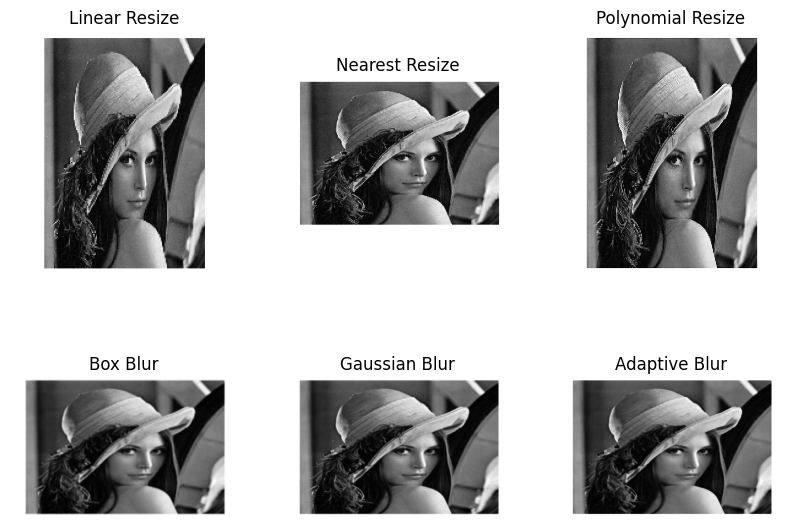

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (Replace 'image.jpg' with your actual image path)
image = cv2.imread('/content/Screenshot 2025-01-29 205007.png', cv2.IMREAD_GRAYSCALE)

# Image Resizing using different interpolation methods
resize_linear = cv2.resize(image, (150, 200), interpolation=cv2.INTER_LINEAR)
resize_nearest = cv2.resize(image, (300, 200), interpolation=cv2.INTER_NEAREST)
resize_poly = cv2.resize(image, (200, 250), interpolation=cv2.INTER_CUBIC)

# Image Blurring
box_blur = cv2.blur(image, (5,5))  # Box Blurring
gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)  # Gaussian Blurring
adaptive_blur = cv2.medianBlur(image, 5)  # Adaptive Blurring (Median)

# Display Images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
titles = ["Linear Resize", "Nearest Resize", "Polynomial Resize", "Box Blur", "Gaussian Blur", "Adaptive Blur"]
images = [resize_linear, resize_nearest, resize_poly, box_blur, gaussian_blur, adaptive_blur]

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

In [ ]:
7


Training Naive Bayes...
Cross-validation accuracy: 0.5508
Naive Bayes Results:
Accuracy: 0.5516
Precision: 0.6733
Recall: 0.5415
F1-Score: 0.4964
Confusion Matrix:
[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]

Training Random Forest...
Cross-validation accuracy: 0.9672
Random Forest Results:
Accuracy: 0.9675
Precision: 0.9673
Recall: 0.9674
F1-Score: 0.9673
Confusion Matrix:
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   3    5 1335    4    5   

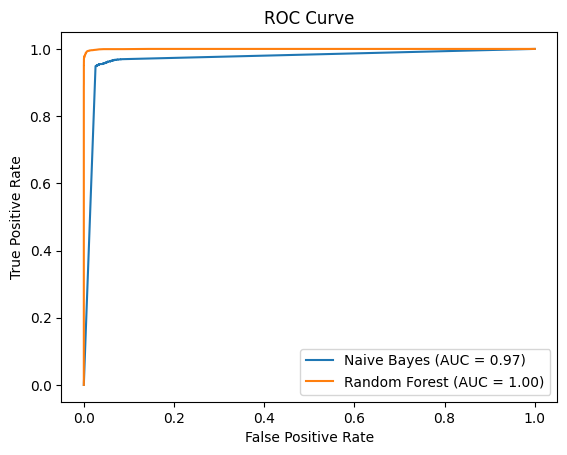

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X = X / 255.0

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers to be used
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Perform K-fold cross-validation and compute metrics
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

    # Train model on the entire training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    print(f"Confusion Matrix:\n{cm}")

    # Plot ROC Curve
    y_score = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Display ROC curve
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
